In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#import geocoder
#from bs4 import BeautifulSoup

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  openssl                                 1.1.1g-h516909a_0 --> 1.1.1g-h516909a_1



openssl-1.1.1g       | 2.1 MB    | #####

# import data

In [2]:
dfIRS=pd.read_json('irs.json',orient='columns') 
pricing_data=json_normalize(dfIRS['fields']) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [3]:

isRentable=pricing_data['agi_group']=='$100,000 or more'
zips_rentable=pricing_data[isRentable]

In [4]:
zips_rentable.head()

,code,name,state,statefips,agi_stub,zipcode,number,amount,year,agi_group
2,02650,Total income,CA,6,6,90504,790,231326,2017,"$100,000 or more"
8,02650,Total income,CA,6,6,90706,370,113438,2017,"$100,000 or more"
13,02650,Total income,CA,6,6,90011,20,9774,2017,"$100,000 or more"
15,02650,Total income,CA,6,6,90018,260,107299,2017,"$100,000 or more"
21,02650,Total income,CA,6,6,90031,180,68242,2017,"$100,000 or more"


In [5]:
df=pd.read_json('Cali.json',orient='columns') 


In [6]:
data = json_normalize(df['fields']) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [7]:
data.head(5)

,city,zip,dst,geopoint,longitude,state,latitude,timezone
0,Calexico,92232,1,"[33.026203, -115.284581]",-115.284581,CA,33.026203,-8
1,Goshen,93227,1,"[36.357151, -119.425371]",-119.425371,CA,36.357151,-8
2,Huron,93234,1,"[36.209815, -120.0847]",-120.084700,CA,36.209815,-8
3,June Lake,93529,1,"[37.765218, -119.07769]",-119.077690,CA,37.765218,-8
4,Fresno,93761,1,"[36.746375, -119.639658]",-119.639658,CA,36.746375,-8


# Reduce the size of the data to only a region

In [8]:
data2=data.iloc[:500]

In [9]:
#data.drop(['dst','state','timezone','geopoint'],axis=1,inplace=True)

true_false1 = pd.DataFrame(data['latitude'] < 34.492907)

Data2 = data[data["latitude"]< 34.492907]
data3=Data2[Data2['latitude']> 33.5]
data4=data3[data3['longitude']<-117.564376]

groupedData=data4.groupby('city')
#groupedData.groups

#for group in groupedData:
  #  print (group)

In [10]:
latitude=33.745389
longitude= -117.836513
map_cali= folium.Map(location=[latitude, longitude], zoom_start=10)
map_cali

In [11]:
for (lat, lng, city, Zip) in zip (data4['latitude'], data4['longitude'], data4['city'], data4['zip']):
    label = '{}, {}'.format(city, Zip)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cali)  
    
map_cali

In [19]:
CLIENT_ID = 'ENJ4JMI54OZ1IKLL1HNTEIF34LZ4ZCKRAEEXRWUC2G55DN5J' # your Foursquare ID
CLIENT_SECRET = 'JCF3P2PSLJMLQ4ABKICZYGZN2DGUJHIHCEEGQJS5S4UGPTZW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


# Test

In [20]:
place_latitude = data4.loc[7, 'latitude'] # 
place_longitude = data4.loc[7, 'longitude'] # 

place_name = data4.loc[7, 'city'] # 

print('Latitude and longitude values of {} are {}, {}.'.format(place_name, 
                                                               place_latitude, 
                                                               place_longitude))

Latitude and longitude values of Los Angeles are 34.089459, -118.3285.


# Remember I have 755 places < 950 calls a day "in theory"

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    place_latitude, 
    place_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ENJ4JMI54OZ1IKLL1HNTEIF34LZ4ZCKRAEEXRWUC2G55DN5J&client_secret=JCF3P2PSLJMLQ4ABKICZYGZN2DGUJHIHCEEGQJS5S4UGPTZW&v=20180605&ll=34.089459,-118.3285&radius=500&limit=100'

In [22]:
results = requests.get(url).json()

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,EDGE Performing Arts Center,Dance Studio,34.088245,-118.329057
1,Gold's Gym,Gym,34.089513,-118.329800
2,Cactus Taqueria,Taco Place,34.088149,-118.326515
3,Project Angel Food,Non-Profit,34.087750,-118.326441
4,The Pack Theater,Indie Theater,34.090662,-118.330680


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Get the venues

In [30]:
Cali_venues = getNearbyVenues(names=data4['city'],
                                   latitudes=data4['latitude'],
                                   longitudes=data4['longitude']
                                  )

Los Angeles
Los Angeles
Irvine
Santa Barbara
Inglewood
Fullerton
Pasadena
Simi Valley
Long Beach
Santa Barbara
Arcadia
Garden Grove
Pasadena
Long Beach
Compton
Calabasas
Los Angeles
Torrance
Long Beach
Corona
Oxnard
Foothill Ranch
West Hollywood
Inglewood
Orange
Los Angeles
Newbury Park
Irvine
Alhambra
Beverly Hills
South Pasadena
Altadena
Los Angeles
San Fernando
Oak Park
Anaheim
Granada Hills
West Hills
Los Angeles
Garden Grove
Monrovia
Irvine
Santa Barbara
Anaheim
Los Angeles
Sherman Oaks
Woodland Hills
Bell Gardens
Panorama City
Corona Del Mar
Brea
Los Angeles
Temple City
Long Beach
Garden Grove
Norwalk
Burbank
Placentia
Stevenson Ranch
Fullerton
Duarte
La Puente
Los Angeles
Long Beach
Yorba Linda
Encino
Arcadia
Northridge
Camarillo
Claremont
Wilmington
North Hollywood
Long Beach
Whittier
Cypress
Santa Monica
Newport Coast
Topanga
Westminster
Huntington Beach
Santa Fe Springs
Canoga Park
Chatsworth
Burbank
Long Beach
Newbury Park
Santa Ana
Santa Barbara
Redondo Beach
Westlake Villa

In [31]:
print(Cali_venues.shape)
#Cali_venues.head()

(10571, 7)


In [ ]:
#Cali_venues.groupby('city').count()

In [ ]:
#Cali_venues.groupby('Venue Category').count()

# Define the venue categories to look for

In [32]:
#note: Bar
#Motel
#Latin American Restaurant
#Mexican Restaurant
#Nightclub
#Pub
#Office
#Taco Place
isTaco=Cali_venues['Venue Category']=='Taco Place'
Taco_places=Cali_venues[isTaco]

isNight=Cali_venues['Venue Category']=='Nightclub'
NightClub_places=Cali_venues[isNight]

isBar=Cali_venues['Venue Category']=='Bar'
Bar_places=Cali_venues[isBar]

isMexican_Restaurants=Cali_venues['Venue Category']=='Mexican Restaurant' 
MexicanRestaurant_places=Cali_venues[isMexican_Restaurants]


# Create only one DF 

In [33]:

Taco_places.append([NightClub_places,Bar_places,MexicanRestaurant_places])


mix_df=Taco_places.append([NightClub_places,Bar_places,MexicanRestaurant_places])
print(mix_df.shape)


(415, 7)


In [ ]:
#mix_df

In [34]:
mix_df.reset_index()
mix_df.shape

(415, 7)

In [35]:
grouped_mix=mix_df.groupby('city')
#grouped_mix.count()

# Print the result in a map

In [36]:
for (lat, lng, city, name) in zip (mix_df['Latitude'], mix_df['Longitude'], mix_df['city'],mix_df['Venue']):
    label = '{},{}'.format(name,city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cali)  
    
map_cali

In [37]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
tacoplace_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
marker = plugins.MarkerCluster().add_to(tacoplace_map)

for (lat, lng, city, name) in zip (mix_df['Latitude'], mix_df['Longitude'], mix_df['city'],mix_df['Venue']):
    label = '{},{}'.format(name,city)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=None,
        ).add_to(marker)  
    
tacoplace_map


In [41]:
from sklearn.cluster import KMeans

number_of_clusters = 20

good_xys = mix_df[['Latitude', 'Longitude']].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)

print(cluster_centers)


[[  33.78443126 -118.1778479 ]
 [  34.05032356 -118.24679   ]
 [  34.42230383 -119.704655  ]
 [  33.78652696 -117.83192183]
 [  34.16706012 -118.40982467]
 [  34.09961936 -117.90505636]
 [  34.259356   -119.1772028 ]
 [  33.889591   -118.35685135]
 [  33.8066248  -117.99419865]
 [  33.52281538 -117.70607162]
 [  34.00679787 -118.042758  ]
 [  34.12098881 -118.14574375]
 [  34.09466505 -118.32933024]
 [  34.07538742 -117.67945583]
 [  33.64911987 -117.90222607]
 [  34.2217471  -118.623838  ]
 [  34.01337132 -118.43690548]
 [  34.29176783 -118.4159575 ]
 [  34.35876    -117.62752   ]
 [  33.968162   -118.18447958]]


# Clusters

In [40]:
from folium.plugins import HeatMap
cluster_centers =  kmeans.cluster_centers_

map_scal = folium.Map(location=[latitude, longitude], zoom_start=9)

for lon, lat in cluster_centers:
    
    folium.CircleMarker([lon, lat], radius=5,color='blue',fill=True,fill_opacity=0.7).add_to(map_scal)  

map_scal




In [42]:

def num_venuesAround(Latitude, Longitude, radius=0.1):    
    count = []
    aux=0.5
    for ind in range(0, 755):
        res_x = data4['latitude'].values[ind]
        res_y = data4['longitude'].values[ind]
        d = calc_xy_distance(Latitude, Longitude, res_x, res_y)
        if d<=radius:
            count.append(data4['zip'].values[ind])
            #print(d)
    return count

def closest_zip(Latitude, Longitude, radius=0.1):    
    count = []
    aux=1
    for ind in range(0, 755):
        res_x = data4['latitude'].values[ind]
        res_y = data4['longitude'].values[ind]
        d = calc_xy_distance(Latitude, Longitude, res_x, res_y)
        if d<aux:
            count=data4['zip'].values[ind]
            aux=d
            #print(d)
    return count
def zip_to_longlag(zips):
    location=()
    for ind in range(0, 755):
        test155=data4['zip'].values==zips
        ress=data4[test155]
    location=(ress['latitude'],ress['longitude'])
    return location

In [43]:
#data4['zip']
data4['latitude'].shape

(755,)

In [44]:
mix_df.size

2905

In [45]:
import math

In [46]:
mix_df['Latitude'].values[0]

34.089459

In [47]:

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [48]:
Centroids=[]
for ind in range(0, 20):
    x=cluster_centers[ind][0]
    y=cluster_centers[ind][1]
    count = closest_zip(x, y, radius=50)
    print(" Closest zip: " + count )
    Centroids.append(count)
    #roi_restaurant_counts.append(count)
    

 Closest zip: 90813
 Closest zip: 90013
 Closest zip: 93101
 Closest zip: 92866
 Closest zip: 91607
 Closest zip: 91722
 Closest zip: 93004
 Closest zip: 90260
 Closest zip: 90680
 Closest zip: 92677
 Closest zip: 90601
 Closest zip: 91030
 Closest zip: 90028
 Closest zip: 91763
 Closest zip: 92627
 Closest zip: 91304
 Closest zip: 90066
 Closest zip: 91342
 Closest zip: 92397
 Closest zip: 90201


In [49]:
zips_rentable['zipcode'].head()

2     90504
8     90706
13    90011
15    90018
21    90031
Name: zipcode, dtype: object

In [50]:
Centroids[0]

'90813'

In [51]:
test=zips_rentable['zipcode'].values==Centroids[0]
test1=zips_rentable['zipcode'].values==Centroids[1]
test2=zips_rentable['zipcode'].values==Centroids[2]
test3=zips_rentable['zipcode'].values==Centroids[3]
test4=zips_rentable['zipcode'].values==Centroids[4]
test5=zips_rentable['zipcode'].values==Centroids[5]
test6=zips_rentable['zipcode'].values==Centroids[6]
test7=zips_rentable['zipcode'].values==Centroids[7]
test8=zips_rentable['zipcode'].values==Centroids[8]
test9=zips_rentable['zipcode'].values==Centroids[9]
test10=zips_rentable['zipcode'].values==Centroids[10]
test11=zips_rentable['zipcode'].values==Centroids[11]
test12=zips_rentable['zipcode'].values==Centroids[12]
test13=zips_rentable['zipcode'].values==Centroids[13]
test14=zips_rentable['zipcode'].values==Centroids[14]
test15=zips_rentable['zipcode'].values==Centroids[15]
test16=zips_rentable['zipcode'].values==Centroids[16]
test17=zips_rentable['zipcode'].values==Centroids[17]
test18=zips_rentable['zipcode'].values==Centroids[18]
test19=zips_rentable['zipcode'].values==Centroids[19]

final=zips_rentable[test]
final1=zips_rentable[test1]
final2=zips_rentable[test2]
final3=zips_rentable[test3]
final4=zips_rentable[test4]
final5=zips_rentable[test5]
final6=zips_rentable[test6]
final7=zips_rentable[test7]
final8=zips_rentable[test8]
final9=zips_rentable[test9]
final10=zips_rentable[test10]
final11=zips_rentable[test11]
final12=zips_rentable[test12]
final13=zips_rentable[test13]
final14=zips_rentable[test14]
final15=zips_rentable[test15]
final16=zips_rentable[test16]
final17=zips_rentable[test17]
final18=zips_rentable[test18]
final19=zips_rentable[test19]
Decide=final.append([final1,final2,final3,final4,final5,final6,final7,final8,final9,final10,final11,final12,final13,final14,final15,final16,final17,final18,final19])

In [52]:
Decide.drop(columns=['code','name','state','statefips','agi_stub','year','amount'], inplace=True)

In [53]:
Decide.head()

,zipcode,number,agi_group
7187,90813,60,"$100,000 or more"
6806,90013,300,"$100,000 or more"
8230,93101,740,"$100,000 or more"
4340,92866,280,"$100,000 or more"
3139,91607,1140,"$100,000 or more"


In [54]:

    
d_final = pd.DataFrame()

for index in range(0,19):
    loc= zip_to_longlag(Decide['zipcode'].values[index])
    temp = pd.DataFrame(
        {
            'number': Decide['number'].values[index],
            'Latitude': loc[0],
            'Longitude': loc[1]
        }
    )

    d_final = pd.concat([d_final, temp])

In [55]:
Decide['zipcode'].values[0]

'90813'

In [56]:
d_final.head()

,number,Latitude,Longitude
807,60,33.781011,-118.19197
120,300,34.044662,-118.24255
1827,740,34.420163,-119.70650
2662,280,33.785091,-117.84569
1706,1140,34.165706,-118.39986


In [57]:
final_sorted=d_final.sort_values(by=['number'],ascending=False)

In [58]:
final_sorted.head(10)

,number,Latitude,Longitude
1403,5150,33.531938,-117.70250
2390,3260,34.002011,-118.43083
109,2000,34.112958,-118.15577
1111,1790,33.647028,-117.91506
1706,1140,34.165706,-118.39986
370,1120,34.218654,-118.62538
1827,740,34.420163,-119.70650
1634,700,34.278812,-119.16784
2299,610,34.002333,-118.03562
927,560,34.307877,-118.42904


In [59]:
final_sorted.reset_index()

,index,number,Latitude,Longitude
0,1403,5150,33.531938,-117.70250
1,2390,3260,34.002011,-118.43083
2,109,2000,34.112958,-118.15577
3,1111,1790,33.647028,-117.91506
4,1706,1140,34.165706,-118.39986
5,370,1120,34.218654,-118.62538
6,1827,740,34.420163,-119.70650
7,1634,700,34.278812,-119.16784
8,2299,610,34.002333,-118.03562
9,927,560,34.307877,-118.42904


# Top 20 choices


<AxesSubplot:>

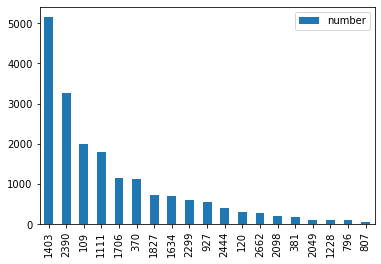

In [60]:
plots=final_sorted.drop(columns=['Latitude','Longitude'])
plots.plot.bar()

In [61]:
top3=final_sorted[:3]

In [62]:
top3

,number,Latitude,Longitude
1403,5150,33.531938,-117.70250
2390,3260,34.002011,-118.43083
109,2000,34.112958,-118.15577


In [63]:
latitude=33.745389
longitude= -117.836513
map_cali_final= folium.Map(location=[latitude, longitude], zoom_start=10)
map_cali_final

# Final map

In [64]:
for (lat, lng, number) in zip (top3['Latitude'], top3['Longitude'], top3['number']):
    label = '{}'.format(number)
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cali_final)  
    
map_cali_final